## **Load Library**

In [23]:
import os
import warnings
warnings.filterwarnings('ignore')

print("Importing library...\n")

import cv2
import PIL
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib
import mediapipe as mp
import ipywidgets as widgets
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as T
from huggingface_hub import hf_hub_download

print(f"Torch   : {torch.__version__}")
print(f"MediaPipe   : {mp.__version__}")
print(f"OpenCV      : {cv2.__version__}")
print(f"NumPy       : {np.__version__}")
print(f"Pandas      : {pd.__version__}")
print(f"Seaborn     : {sns.__version__}")
print(f"Pillow      : {PIL.__version__}")
print(f"Matplotlib  : {matplotlib.__version__}")

print("\nAll library loaded successfully")

Importing library...

Torch   : 2.9.1+cpu
MediaPipe   : 0.10.14
OpenCV      : 4.12.0
NumPy       : 2.1.3
Pandas      : 2.3.3
Seaborn     : 0.13.2
Pillow      : 12.0.0
Matplotlib  : 3.10.7

All library loaded successfully


## **Load Pre-Trained Model and Predict Test**

In [24]:
import torch
import torch.nn.functional as F
import torchvision.transforms as T
from PIL import Image
from IPython.display import Image as IPImage, display
from huggingface_hub import hf_hub_download

# Setup
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Download model
print("Downloading model from Hugging Face...")
model_path = hf_hub_download(
    repo_id="fahd9999/face_shape_classification",
    filename="model_85_nn_.pth"
)
print(f"✓ Model downloaded to: {model_path}")

# Load model
print("Loading model...")
model = torch.load(model_path, map_location=torch.device(device), weights_only=False)
model.eval()
model.to(device)
print("✓ Model loaded successfully!")
print("-" * 60)

# Preprocessing
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Class names
class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']

Using device: cpu
✓ Model downloaded to: C:\Users\ADVAN\.cache\huggingface\hub\models--fahd9999--face_shape_classification\snapshots\537861ef28ac2cca7bd0228170013b0f5d9e5f04\model_85_nn_.pth
Loading model...
✓ Model loaded successfully!
------------------------------------------------------------


Test Model on Female


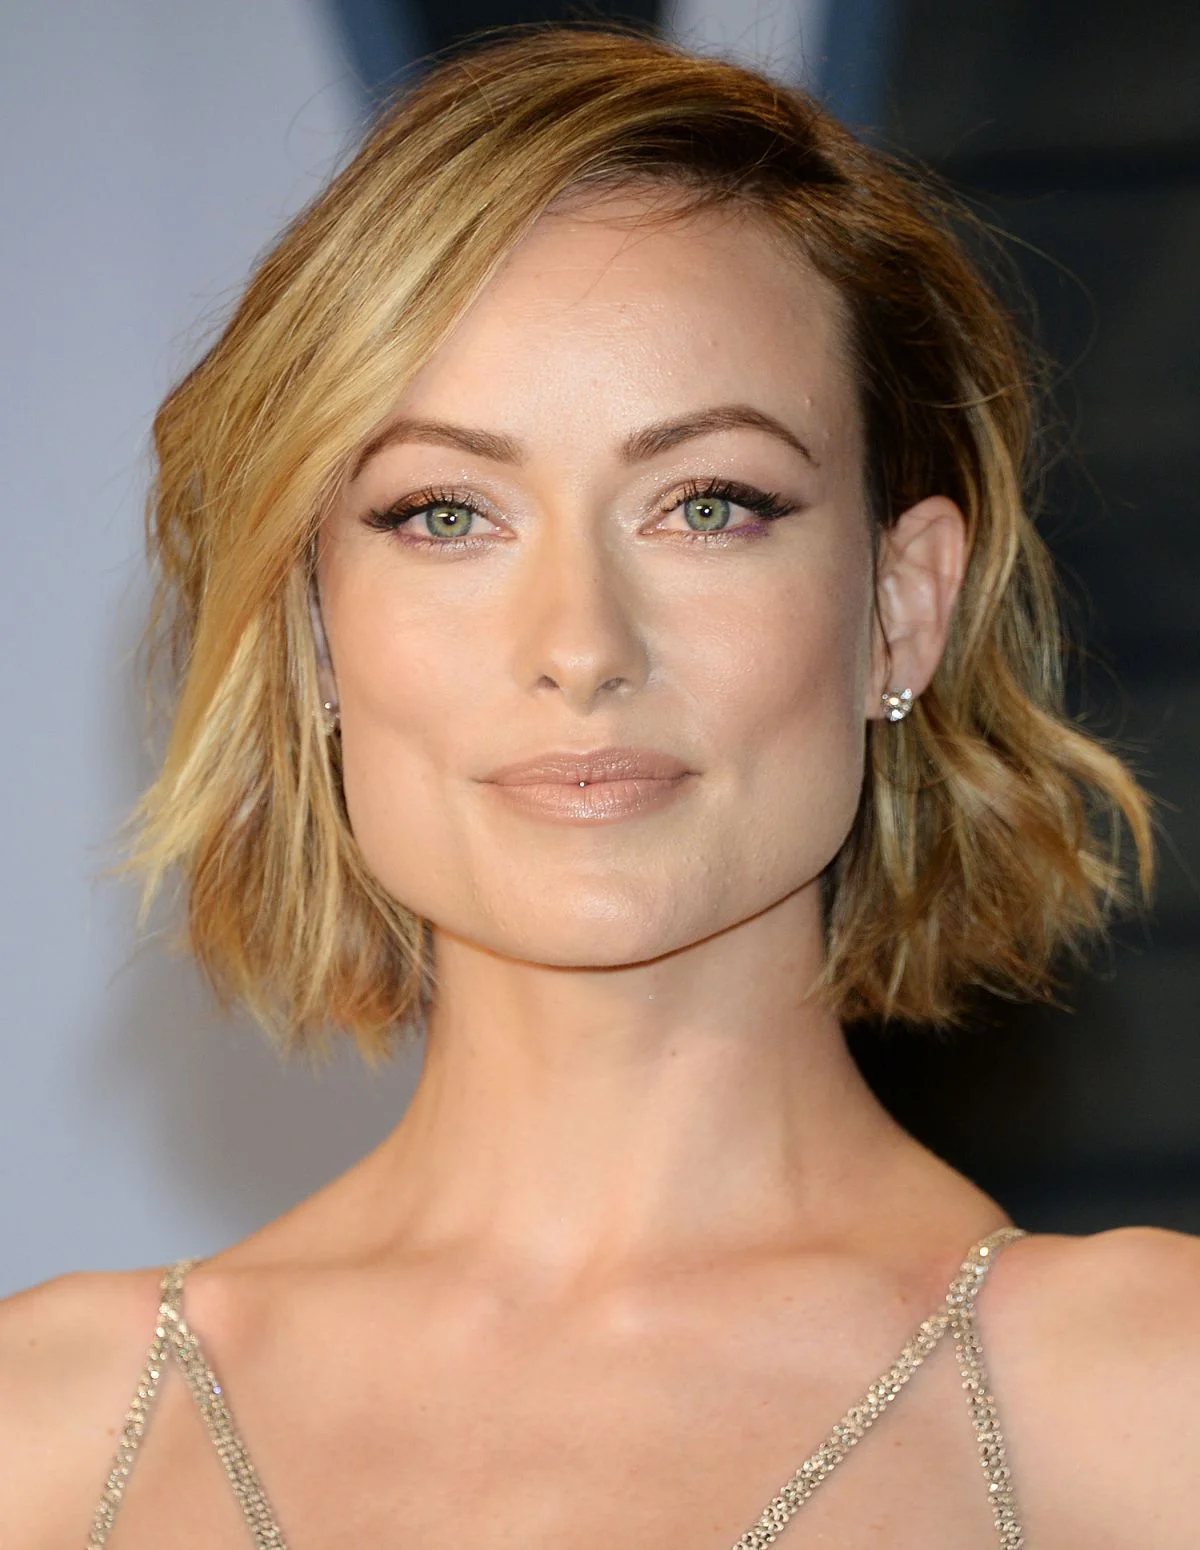


Processing image: ./test/wanita1.jpg
Predicting...

🎯 Model menebak bentuk wajah: SQUARE
📊 Confidence               : 94.09%

📋 Detail semua kelas:
  • Square   → 94.09% ███████████████████████████████████████████████
  • Oval     →  1.94% 
  • Heart    →  1.35% 
  • Oblong   →  1.33% 
  • Round    →  1.30% 
------------------------------------------------------------
Test Model on Male


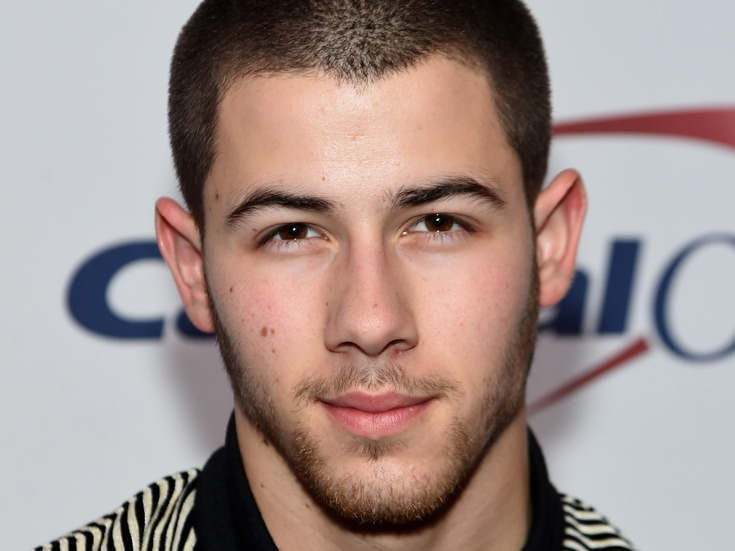


Processing image: ./test/pria1.jpg
Predicting...

🎯 Model menebak bentuk wajah: HEART
📊 Confidence               : 83.67%

📋 Detail semua kelas:
  • Heart    → 83.67% █████████████████████████████████████████
  • Oval     → 10.64% █████
  • Oblong   →  2.44% █
  • Square   →  2.12% █
  • Round    →  1.13% 


In [25]:
# Load & predict Female
print("Test Model on Female")
image_path = './test/wanita1.jpg'
display(IPImage(filename=image_path, width=400))

print(f"\nProcessing image: {image_path}")
image = Image.open(image_path).convert("RGB")
img_tensor = transform(image).unsqueeze(0).to(device)

# Prediction
print("Predicting...")
with torch.inference_mode():
    outputs = model(img_tensor)
    probs = F.softmax(outputs, dim=1) * 100
    pred_idx = torch.argmax(outputs, 1).item()

# Results
print(f"\n{'='*60}")
print(f"🎯 Model menebak bentuk wajah: {class_names[pred_idx].upper()}")
print(f"📊 Confidence               : {probs[0][pred_idx]:.2f}%")
print(f"{'='*60}")
print("\n📋 Detail semua kelas:")

probs_dict = {class_names[i]: probs[0][i].item() for i in range(len(class_names))}
sorted_probs = dict(sorted(probs_dict.items(), key=lambda x: x[1], reverse=True))

for name, prob in sorted_probs.items():
    bar = "█" * int(prob / 2)
    print(f"  • {name:8} → {prob:5.2f}% {bar}")
print("-"*60)

# Load & predict Male
print("Test Model on Male")
image_path = './test/pria1.jpg'
display(IPImage(filename=image_path, width=400))

print(f"\nProcessing image: {image_path}")
image = Image.open(image_path).convert("RGB")
img_tensor = transform(image).unsqueeze(0).to(device)

# Prediction
print("Predicting...")
with torch.inference_mode():
    outputs = model(img_tensor)
    probs = F.softmax(outputs, dim=1) * 100
    pred_idx = torch.argmax(outputs, 1).item()

# Results
print(f"\n{'='*60}")
print(f"🎯 Model menebak bentuk wajah: {class_names[pred_idx].upper()}")
print(f"📊 Confidence               : {probs[0][pred_idx]:.2f}%")
print(f"{'='*60}")
print("\n📋 Detail semua kelas:")

probs_dict = {class_names[i]: probs[0][i].item() for i in range(len(class_names))}
sorted_probs = dict(sorted(probs_dict.items(), key=lambda x: x[1], reverse=True))

for name, prob in sorted_probs.items():
    bar = "█" * int(prob / 2)
    print(f"  • {name:8} → {prob:5.2f}% {bar}")

## **Load Glasses Frame**

Memeriksa folder 'frames'...

Berhasil load → aviator.png  (ukuran: (600, 600, 4))
Berhasil load → oval.png  (ukuran: (600, 600, 4))
Berhasil load → wayfarer.png  (ukuran: (600, 600, 4))
Berhasil load → round.png  (ukuran: (600, 600, 4))
Berhasil load → pantos.png  (ukuran: (600, 600, 4))
Berhasil load → square.png  (ukuran: (600, 600, 4))
Berhasil load → rectangle.png  (ukuran: (600, 600, 4))
Berhasil load → cateye.png  (ukuran: (600, 600, 4))
Berhasil load → browline.png  (ukuran: (600, 600, 4))

Total berhasil load : 9 / 9
Semua frame berhasil di-load!

Preview semua frame (ukuran kecil):


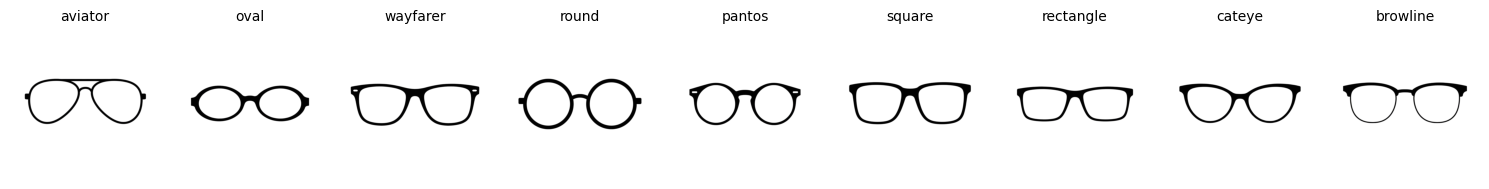

In [26]:
import os
import cv2
from IPython.display import Image, display
import matplotlib.pyplot as plt

folder = "frames"

expected_frames = [
    "aviator", "oval", "wayfarer", "round", 
    "pantos", "square", "rectangle", "cateye", "browline"
]

frames_dict = {}
missing_files = []

print("Memeriksa folder 'frames'...\n")

for name in expected_frames:
    filename = f"{name}.png"
    path = os.path.join(folder, filename)
    
    if os.path.exists(path):
        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        if img is not None:
            frames_dict[name] = img
            print(f"Berhasil load → {filename}  (ukuran: {img.shape})")
        else:
            print(f"Gagal baca gambar → {filename}")
            missing_files.append(filename)
    else:
        print(f"File tidak ditemukan → {filename}")
        missing_files.append(filename)

print("\n" + "="*60)
print(f"Total berhasil load : {len(frames_dict)} / 9")
if missing_files:
    print(f"File yang hilang/gagal : {', '.join(missing_files)}")
else:
    print("Semua frame berhasil di-load!")

print("\nPreview semua frame (ukuran kecil):")
fig, axes = plt.subplots(1, len(frames_dict), figsize=(15, 3))
if len(frames_dict) == 1:
    axes = [axes]
for idx, (name, img) in enumerate(frames_dict.items()):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
    axes[idx].imshow(rgb_img)
    axes[idx].set_title(name, fontsize=10)
    axes[idx].axis('off')
plt.tight_layout()
plt.show()

## **Download Mediapipe Model**

In [27]:
import os
import urllib.request
import zipfile
from pathlib import Path

model_dir = Path("mediapipe_models")
model_dir.mkdir(exist_ok=True)
url = "https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task"
local_path = model_dir / "face_landmarker.task"

if not local_path.exists():
    print("Downloading face_landmarker.task (~2.5MB)...")
    urllib.request.urlretrieve(url, local_path)
    print(f"✓ Model saved to: {local_path}")
else:
    print("Model sudah ada!")

print("Download selesai!")

Model sudah ada!
Download selesai!


## **Face Mesh Using Mediapipe**

In [28]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np
import time
import os
from IPython.display import Image as IPImage, display

os.makedirs("results", exist_ok=True)

# Setup MediaPipe
print("Melakukan setup mediapipe face landmark...")
model_path = "mediapipe_models/face_landmarker.task"
BaseOptions = python.BaseOptions
FaceLandmarker = vision.FaceLandmarker
FaceLandmarkerOptions = vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode
options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.VIDEO,
    num_faces=1,
    min_face_detection_confidence=0.5,
    min_tracking_confidence=0.5
)
face_landmarker = FaceLandmarker.create_from_options(options)
print("face landmark siap digunakan")

Melakukan setup mediapipe face landmark...
face landmark siap digunakan


Cell 3: Align titik BIRU ke area HIJAU + tahan 2 detik → screenshot otomatis
Setelah screenshot → program berhenti & dua gambar muncul side-by-side
Tekan 'q' untuk keluar manual

Screenshot berhasil!
  • Dengan mesh: ./results/facemesh_image.jpg
  • Bersih      : ./results/clean_image.jpg


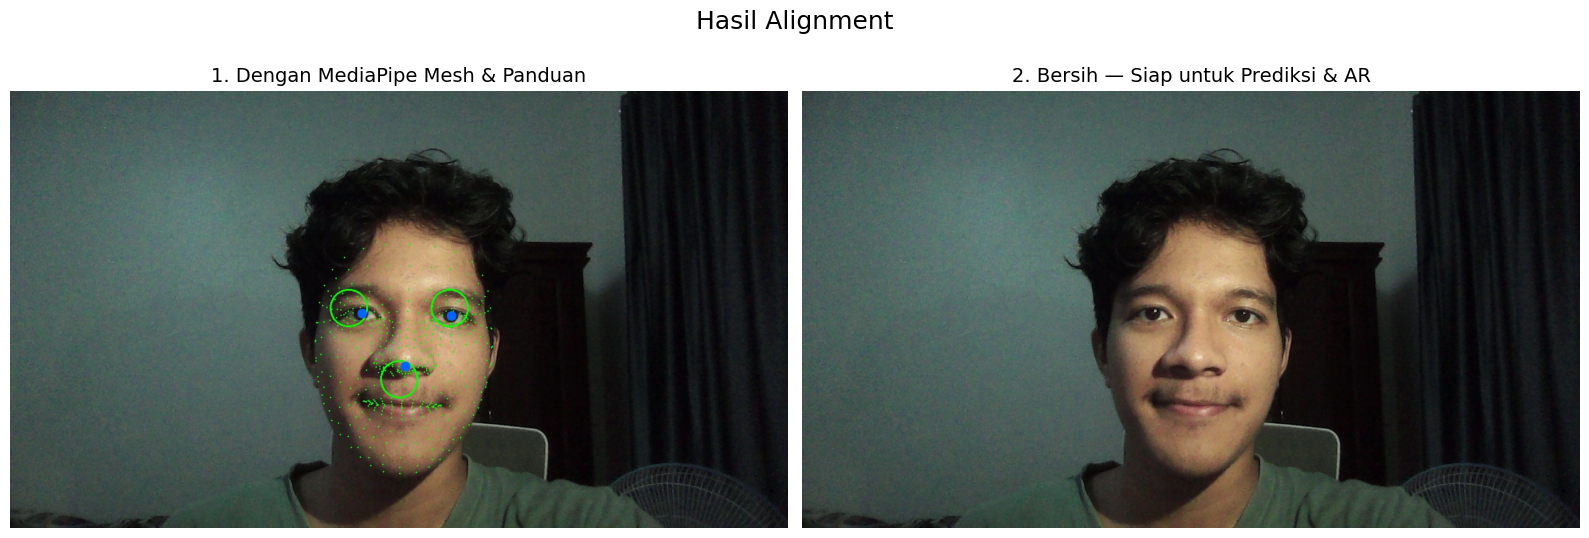

In [29]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np
import time
import os
from IPython.display import Image as IPImage, display
import matplotlib.pyplot as plt

os.makedirs("./results", exist_ok=True)

# Indeks landmark
LEFT_EYE = 468
RIGHT_EYE = 473
NOSE_TIP = 1

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

aligned_frames = 0
required_frames = 60
threshold = 30
screenshot_with_mesh = "./results/facemesh_image.jpg"
screenshot_clean = "./results/clean_image.jpg"
screenshot_taken = False

print("Cell 3: Align titik BIRU ke area HIJAU + tahan 2 detik → screenshot otomatis")
print("Setelah screenshot → program berhenti & dua gambar muncul side-by-side")
print("Tekan 'q' untuk keluar manual")

while cap.isOpened() and not screenshot_taken:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.flip(frame, 1)
    display_frame = frame.copy()
    clean_frame = frame.copy()
    
    h, w = frame.shape[:2]
    center_x = w // 2
    center_y = h // 2

    eye_distance = int(w * 0.065) # jarak kedua mata
    eye_y_offset = int(h * 0.003) # jarak atas bawah
    nose_y_offset = int(h * 0.16)
    GUIDE_LEFT_EYE = (center_x - eye_distance, center_y - eye_y_offset)
    GUIDE_RIGHT_EYE = (center_x + eye_distance, center_y - eye_y_offset)
    GUIDE_NOSE = (center_x, center_y + nose_y_offset)

    for pt in [GUIDE_LEFT_EYE, GUIDE_RIGHT_EYE, GUIDE_NOSE]:
        cv2.circle(display_frame, pt, threshold, (0, 255, 0), 2)       

    # Process frame
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)
    timestamp_ms = int(time.time() * 1000)
    results = face_landmarker.detect_for_video(mp_image, timestamp_ms)

    if results.face_landmarks:
        landmarks = results.face_landmarks[0]

        # Gambar landmark hijau kecil
        for lm in landmarks:
            x = int(lm.x * w)
            y = int(lm.y * h)
            cv2.circle(display_frame, (x, y), 1, (0, 255, 0), -1)

        # Titik biru di wajah user
        left_eye = (int(landmarks[LEFT_EYE].x * w), int(landmarks[LEFT_EYE].y * h))
        right_eye = (int(landmarks[RIGHT_EYE].x * w), int(landmarks[RIGHT_EYE].y * h))
        nose = (int(landmarks[NOSE_TIP].x * w), int(landmarks[NOSE_TIP].y * h))

        cv2.circle(display_frame, left_eye, 8, (255,100,0), -1)
        cv2.circle(display_frame, right_eye, 8, (255,100,0), -1)
        cv2.circle(display_frame, nose, 8, (255,100,0), -1)

        dist_left = np.linalg.norm(np.array(left_eye) - np.array(GUIDE_LEFT_EYE))
        dist_right = np.linalg.norm(np.array(right_eye) - np.array(GUIDE_RIGHT_EYE))
        dist_nose = np.linalg.norm(np.array(nose) - np.array(GUIDE_NOSE))

        if dist_left < threshold and dist_right < threshold and dist_nose < threshold:
            aligned_frames += 1
            if aligned_frames >= required_frames:
                cv2.imwrite(screenshot_with_mesh, display_frame)
                cv2.imwrite(screenshot_clean, clean_frame)       
                print(f"\nScreenshot berhasil!")
                print(f"  • Dengan mesh: {screenshot_with_mesh}")
                print(f"  • Bersih      : {screenshot_clean}")
                screenshot_taken = True
        else:
            aligned_frames = 0

        if aligned_frames > 0:
            remain = max(0, 2 - aligned_frames // 30)
            cv2.putText(display_frame, f"Tahan posisimu", (center_x - 200, center_y - 100),
                        cv2.FONT_HERSHEY_TRIPLEX, 2, (0, 255, 255), 8, cv2.LINE_AA)

    cv2.putText(display_frame, "Align titik BIRU ke area HIJAU", (10, 30),
                cv2.FONT_HERSHEY_DUPLEX, 0.9, (255,255,255), 2)
    cv2.putText(display_frame, "Tahan 2 detik lalu discreenshot", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (200,200,255), 2)

    cv2.imshow("Cell 3 - MediaPipe Face Landmarker", display_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

if screenshot_taken:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    img_mesh = cv2.cvtColor(cv2.imread(screenshot_with_mesh), cv2.COLOR_BGR2RGB)
    img_clean = cv2.cvtColor(cv2.imread(screenshot_clean), cv2.COLOR_BGR2RGB)
    
    axes[0].imshow(img_mesh)
    axes[0].set_title("1. Dengan MediaPipe Mesh & Panduan", fontsize=14)
    axes[0].axis('off')
    
    axes[1].imshow(img_clean)
    axes[1].set_title("2. Bersih — Siap untuk Prediksi & AR", fontsize=14)
    axes[1].axis('off')
    
    plt.suptitle("Hasil Alignment", fontsize=18, y=0.85)
    plt.tight_layout()
    plt.show()

## **Helper Functions**

In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image

# 1. Cek alignment
def is_aligned(landmarks, guide_points, threshold=55):
    le = (int(landmarks[468].x * w), int(landmarks[468].y * h))
    re = (int(landmarks[473].x * w), int(landmarks[473].y * h))
    no = (int(landmarks[1].x * w),   int(landmarks[1].y * h))
    
    dist_left  = np.linalg.norm(np.array(le) - np.array(guide_points[0]))
    dist_right = np.linalg.norm(np.array(re) - np.array(guide_points[1]))
    dist_nose  = np.linalg.norm(np.array(no) - np.array(guide_points[2]))
    
    return dist_left < threshold and dist_right < threshold and dist_nose < threshold

# 2. Hitung jarak antar mata
def get_eye_distance(landmarks, frame_width):
    le = landmarks[468]
    re = landmarks[473]
    return abs(le.x - re.x) * frame_width

# 3. Overlay kacamata
def overlay_glasses(frame, glasses_png, landmarks, eye_distance_ratio=1.8):
    if glasses_png is None:
        return frame
    
    h, w = frame.shape[:2]
    eye_dist = get_eye_distance(landmarks, w)
    
    glasses_width = int(eye_dist * eye_distance_ratio)
    glasses_resized = cv2.resize(glasses_png, (glasses_width, int(glasses_png.shape[0] * glasses_width / glasses_png.shape[1])))
    
    le = (int(landmarks[468].x * w), int(landmarks[468].y * h))
    re = (int(landmarks[473].x * w), int(landmarks[473].y * h))
    center_x = (le[0] + re[0]) // 2
    center_y = (le[1] + re[1]) // 2 - int(h * 0.05)
    x1 = center_x - glasses_resized.shape[1] // 2
    y1 = center_y - glasses_resized.shape[0] // 2
    x2 = x1 + glasses_resized.shape[1]
    y2 = y1 + glasses_resized.shape[0]

    x1 = max(0, x1)
    y1 = max(0, y1)
    x2 = min(w, x2)
    y2 = min(h, y2)
    
    if x1 >= x2 or y1 >= y2:
        return frame
    
    glasses_crop = glasses_resized[y1 - (center_y - glasses_resized.shape[0]//2):y2 - (center_y - glasses_resized.shape[0]//2),
                                   x1 - (center_x - glasses_resized.shape[1]//2):x2 - (center_x - glasses_resized.shape[1]//2)]
    
    alpha = glasses_crop[:, :, 3] / 255.0
    alpha_inv = 1.0 - alpha
    
    for c in range(3):
        frame[y1:y2, x1:x2, c] = (alpha * glasses_crop[:, :, c] + alpha_inv * frame[y1:y2, x1:x2, c])
    
    return frame

# 4. Perspective warp
def apply_perspective_warp(glasses_img, yaw_angle=0, pitch_angle=0):
    h, w = glasses_img.shape[:2]
    scale_y = 1 + pitch_angle / 100 
    
    warped = cv2.resize(glasses_img, None, fx=1, fy=scale_y)
    if scale_y > 1:
        crop = warped[int((scale_y-1)*h//2):int((scale_y-1)*h//2)+h, :]
    else:
        pad = int((1-scale_y)*h//2)
        crop = cv2.copyMakeBorder(warped, pad, pad, 0, 0, cv2.BORDER_CONSTANT, value=0)
        crop = crop[:h, :]
    
    return crop

# 5. Prediksi bentuk wajah
def predict_face_shape(image_path, model, device='cpu'):
    class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
    
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    img = Image.open(image_path).convert("RGB")
    tensor = transform(img).unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(tensor)
        probs = torch.softmax(output, dim=1) * 100
        pred_idx = torch.argmax(output, 1).item()
    
    return class_names[pred_idx], probs[0][pred_idx].item()

print("Helper Functions siap digunakan")

Helper Functions siap digunakan


## **Predict From Screenshot**

Gambar wajah yang sudah aligned & bersih:


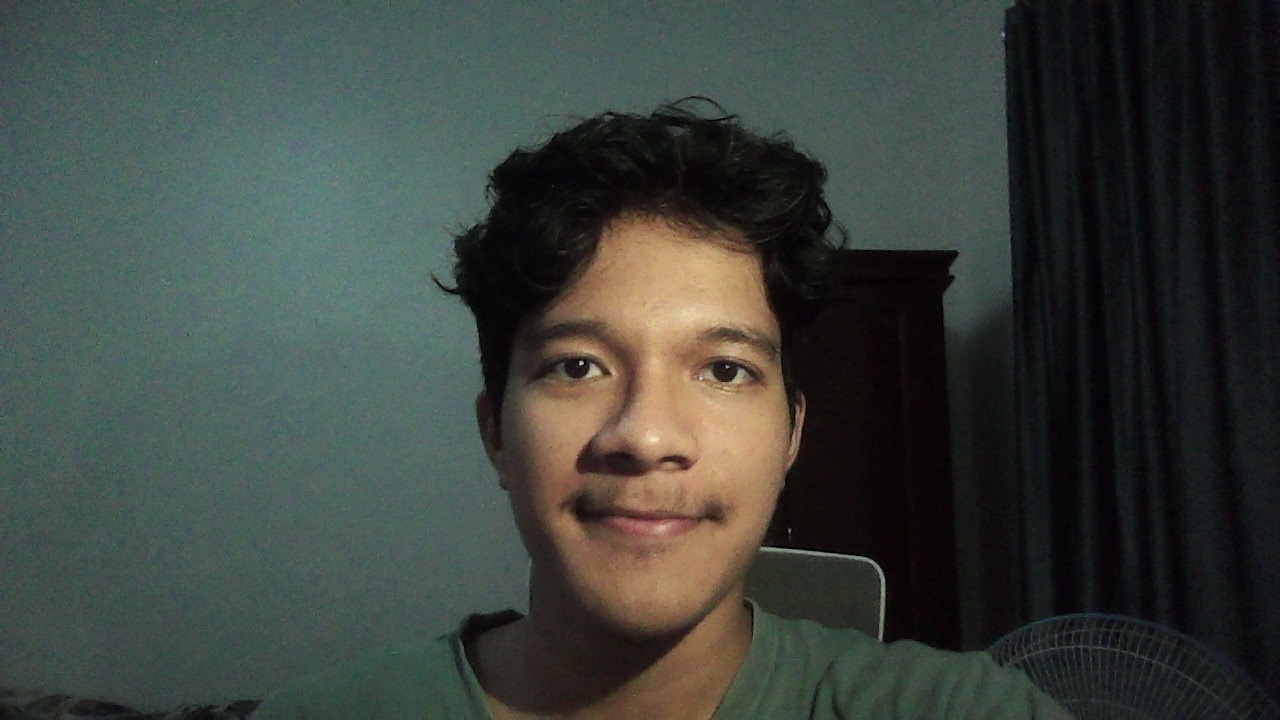


🎯 BENTUK WAJAH TERDETEKSI: OBLONG
📊 Confidence: 33.28%

📋 Detail Probabilitas Semua Kelas:
  • Oblong   →  33.28%  ███████████
  • Heart    →  22.54%  ███████
  • Oval     →  22.03%  ███████
  • Square   →  13.68%  ████
  • Round    →   8.47%  ██


In [ ]:
from PIL import Image
import torch
import torchvision.transforms as T
from IPython.display import Image as IPImage, display
import matplotlib.pyplot as plt

screenshot_path = "results/clean_image.jpg" 

print("Gambar wajah yang sudah aligned & bersih:")
display(IPImage(screenshot_path, width=500))

transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img = Image.open(screenshot_path).convert("RGB")
img_tensor = transform(img).unsqueeze(0).to(device)

with torch.inference_mode():
    outputs = model(img_tensor)
    probs = torch.softmax(outputs, dim=1) * 100
    pred_idx = torch.argmax(outputs, 1).item()

predicted_shape = class_names[pred_idx]
confidence = probs[0][pred_idx].item()

print(f"\n{'='*60}")
print(f"🎯 BENTUK WAJAH TERDETEKSI: {predicted_shape.upper()}")
print(f"📊 Confidence: {confidence:.2f}%")
print(f"{'='*60}")
print("\n📋 Detail Probabilitas Semua Kelas:")
sorted_indices = torch.argsort(probs, dim=1, descending=True)[0]
for i in sorted_indices:
    name = class_names[i]
    prob = probs[0][i].item()
    bar = "█" * int(prob // 3)
    print(f"  • {name:8} → {prob:6.2f}%  {bar}")

## **Overlay Static Frame**

Menggunakan hasil prediksi dari Cell 8: OBLONG
Memuat frame kacamata: wayfarer.png


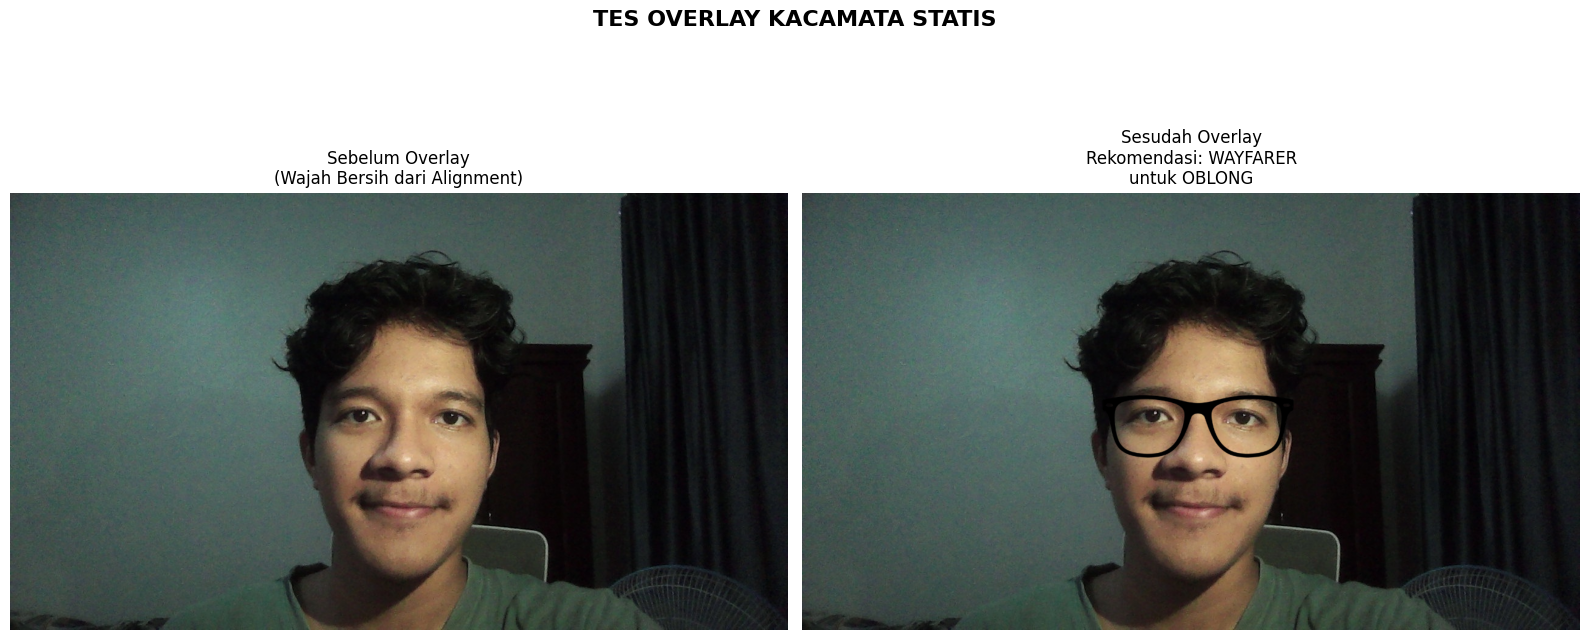

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import os
import matplotlib.pyplot as plt
from IPython.display import display, Image as IPImage


screenshot_path = "./results/clean_image.jpg"
predicted_shape = "Oblong"  
frame_mapping = {
    "Heart":   "cateye.png",      
    "Oblong":  "wayfarer.png",    
    "Oval":    "aviator.png",   
    "Round":   "rectangle.png",   
    "Square":  "oval.png"       
}

glasses_filename = frame_mapping.get(predicted_shape)
if glasses_filename is None:
    print("Error: Bentuk wajah tidak ada di mapping! Tambahkan di frame_mapping.")
else:
    glasses_path = os.path.join("frames", glasses_filename)
    print(f"Memuat frame kacamata: {glasses_filename}")

    frame = cv2.imread(screenshot_path)
    if frame is None:
        print("Error: Screenshot tidak ditemukan! Jalankan Cell 6 dulu.")
    else:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        h, w = frame_rgb.shape[:2]

        BaseOptions = python.BaseOptions
        FaceLandmarker = vision.FaceLandmarker
        options = vision.FaceLandmarkerOptions(
            base_options=BaseOptions(model_asset_path="mediapipe_models/face_landmarker.task"),
            running_mode=vision.RunningMode.IMAGE
        )
        with FaceLandmarker.create_from_options(options) as landmarker:
            mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
            results = landmarker.detect(mp_image)

        if not results.face_landmarks:
            print("Tidak terdeteksi wajah di screenshot!")
        else:
            landmarks = results.face_landmarks[0]

            # Posisi pojok luar mata
            le = (int(landmarks[468].x * w), int(landmarks[468].y * h))
            re = (int(landmarks[473].x * w), int(landmarks[473].y * h))
            eye_dist = np.linalg.norm(np.array(le) - np.array(re))

            if not os.path.exists(glasses_path):
                print(f"Warning: File tidak ditemukan: {glasses_path}")
            else:
                glasses_png = cv2.imread(glasses_path, cv2.IMREAD_UNCHANGED)
                if glasses_png is None:
                    print("Gagal load kacamata!")
                else:
                    # Scaling berdasarkan jarak mata
                    glasses_width = int(eye_dist * 2.5)  
                    glasses_resized = cv2.resize(glasses_png, (glasses_width, 
                                                              int(glasses_png.shape[0] * glasses_width / glasses_png.shape[1])))

                    # Posisi tengah mata
                    center_x = (le[0] + re[0]) // 2
                    center_y = (le[1] + re[1]) // 2 + int(h * 0.02)

                    x1 = center_x - glasses_resized.shape[1] // 2
                    y1 = center_y - glasses_resized.shape[0] // 2
                    x2 = x1 + glasses_resized.shape[1]
                    y2 = y1 + glasses_resized.shape[0]

                    x1, y1 = max(0, x1), max(0, y1)
                    x2, y2 = min(w, x2), min(h, y2)

                    if x1 < x2 and y1 < y2:
                        overlay = glasses_resized[:y2-y1, :x2-x1]
                        if overlay.shape[2] == 4:  # ada alpha
                            alpha = overlay[:, :, 3] / 255.0
                            alpha_inv = 1.0 - alpha
                            for c in range(3):
                                frame_rgb[y1:y2, x1:x2, c] = (alpha * overlay[:, :, c] + 
                                                             alpha_inv * frame_rgb[y1:y2, x1:x2, c])
                        else:
                            frame_rgb[y1:y2, x1:x2] = overlay

        plt.figure(figsize=(16, 8))
        plt.subplot(1, 2, 1)
        original = cv2.cvtColor(cv2.imread(screenshot_path), cv2.COLOR_BGR2RGB)
        plt.imshow(original)
        plt.title("Sebelum Overlay\n(Wajah Bersih dari Alignment)")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(frame_rgb)
        plt.title(f"Sesudah Overlay\nRekomendasi: {glasses_filename.replace('.png', '').upper()}\nuntuk {predicted_shape.upper()}")
        plt.axis('off')

        plt.suptitle("TES OVERLAY KACAMATA STATIS", fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

AR

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import math
import os
import time

model_path = "mediapipe_models/face_landmarker.task"
BaseOptions = python.BaseOptions
FaceLandmarker = vision.FaceLandmarker
options = vision.FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=vision.RunningMode.VIDEO,
    num_faces=1
)
face_landmarker = FaceLandmarker.create_from_options(options)

predicted_shape = "Oblong" 
frame_mapping = {
    "Heart":   "cateye.png",
    "Oblong":  "wayfarer.png",
    "Oval":    "wayfarer.png",
    "Round":   "rectangle.png",
    "Square":  "round.png"
}

glasses_filename = frame_mapping.get(predicted_shape, "wayfarer.png")
glasses_path = os.path.join("frames", glasses_filename)
glasses_png = cv2.imread(glasses_path, cv2.IMREAD_UNCHANGED)

cap = cv2.VideoCapture(0)
cap.set(3, 1280)
cap.set(4, 720)

scale_ratio = 3.0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret: break
    frame = cv2.flip(frame, 1)
    h, w = frame.shape[:2]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb)
    results = face_landmarker.detect_for_video(mp_image, int(time.time()*1000))

    if results.face_landmarks and glasses_png is not None:
        lm = results.face_landmarks[0]

        bridge = (int(lm[6].x * w), int(lm[6].y * h)) 
        le = (int(lm[468].x * w), int(lm[468].y * h)) # Mata kiri
        re = (int(lm[473].x * w), int(lm[473].y * h)) # Mata kanan
        
        eye_dist = np.linalg.norm(np.array(le) - np.array(re))

        # Hitung Roll
        delta_y = re[1] - le[1]
        delta_x = re[0] - le[0]
        roll_angle = math.degrees(math.atan2(delta_y, delta_x))

        # Hitung Yaw
        nose_x = lm[1].x
        eye_center_x = (lm[468].x + lm[473].x) / 2
        yaw_val = (nose_x - eye_center_x) * 3
        
        # Hitung Pitch
        nose_y = lm[1].y
        eye_avg_y = (lm[468].y + lm[473].y) / 2
        pitch_val = (nose_y - eye_avg_y) * 10

        # A. Scaling Dasar
        base_width = int(eye_dist * scale_ratio)
        base_height = int(glasses_png.shape[0] * base_width / glasses_png.shape[1]) + 60
        
        # B. Simulasi 3D Warp (Yaw)
        yaw_scale = max(0.5, 1.0 - abs(yaw_val) * 0.7) 
        new_width = int(base_width * yaw_scale)
        
        # C. Simulasi 3D Warp (Pitch)
        pitch_scale = max(0.8, 1.0 - abs(pitch_val) * 0.5)
        new_height = int(base_height * pitch_scale)
        glasses_resized = cv2.resize(glasses_png, (new_width, new_height), interpolation=cv2.INTER_AREA)

        # D. Rotasi (Roll)
        M = cv2.getRotationMatrix2D((new_width // 2, new_height // 2), -roll_angle, 1)
        glasses_final = cv2.warpAffine(glasses_resized, M, (new_width, new_height), 
                                      flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0,0))

        # 5. Anchor
        center_x = bridge[0]
        offset_y = int(eye_dist * 0.05) 
        center_y = bridge[1] + offset_y

        # Koordinat Overlay
        x1 = center_x - glasses_final.shape[1] // 2
        y1 = center_y - glasses_final.shape[0] // 2
        x2 = x1 + glasses_final.shape[1]
        y2 = y1 + glasses_final.shape[0]

        # Boundary check
        if x1 >= 0 and y1 >= 0 and x2 < w and y2 < h:
            overlay = glasses_final[:, :, :3]
            mask = glasses_final[:, :, 3] / 255.0

            for c in range(3):
                frame[y1:y2, x1:x2, c] = (1.0 - mask) * frame[y1:y2, x1:x2, c] + mask * overlay[:, :, c]

    # UI
    cv2.putText(frame, f"Frame: {predicted_shape}", (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("AR Glasses Try-On", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()